11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 16s 25ms/step - loss: 0.2322 - val_loss: 0.1772
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1642 - val_loss: 0.1543
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1509 - val_loss: 0.1463
Epoch 4/20
469/469 [==============================] - 10s 20ms/step - loss: 0.1444 - val_loss: 0.1405
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1388 - val_loss: 0.1355
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1344 - val_loss: 0.1319
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1315 - val_loss: 0.1303
Epoch 8/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1292 - val_loss: 0.1288
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1273 - val_loss: 0.1262
Epoch 10/20
469/469 [===

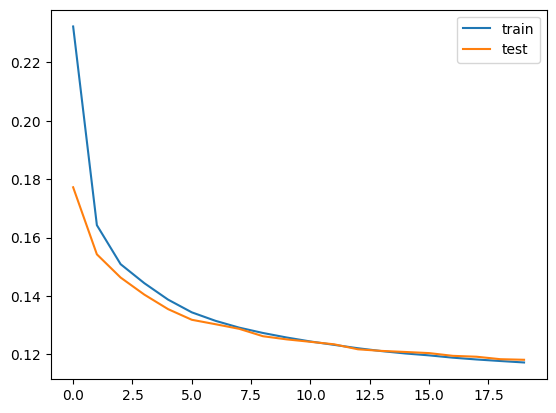

313/313 [==============================] - 1s 2ms/step


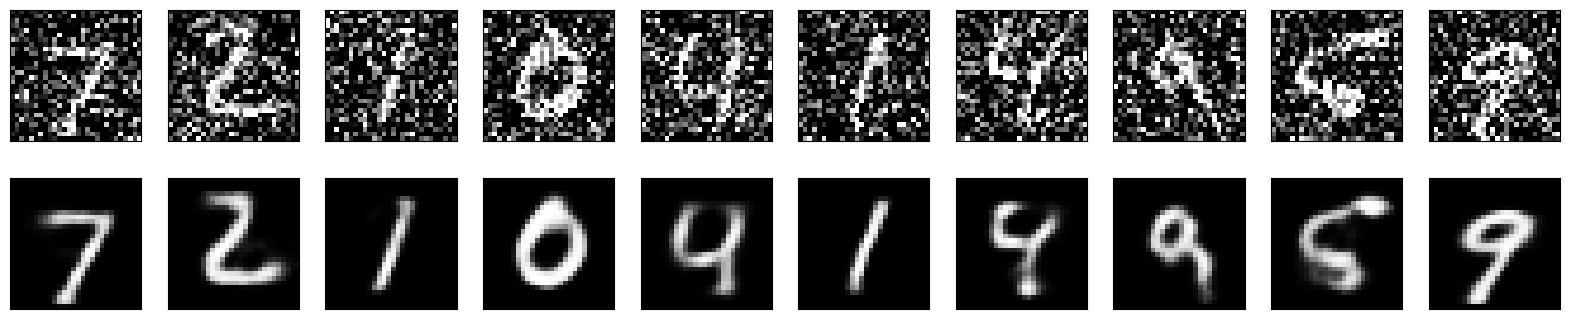

In [1]:
#1.Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.
# Підключення необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Завантаження та підготовка даних
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Додавання шуму до зображень
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Визначення архітектури звичайного автокодувальника (багатошарова нейронна мережа)
input_img = tf.keras.Input(shape=(28, 28))

x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoded = layers.Dense(32, activation='relu')(x)

x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(784, activation='sigmoid')(x)
decoded = layers.Reshape((28, 28))(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Тренування автокодувальника
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Графік функції втрат
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Результати реконструкції
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # вхідні зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # відновлені зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/20
469/469 [==============================] - 388s 825ms/step - loss: 0.1398 - val_loss: 0.1052
Epoch 2/20
469/469 [==============================] - 394s 839ms/step - loss: 0.1024 - val_loss: 0.0995
Epoch 3/20
469/469 [==============================] - 385s 821ms/step - loss: 0.0990 - val_loss: 0.0975
Epoch 4/20
469/469 [==============================] - 388s 827ms/step - loss: 0.0971 - val_loss: 0.0956
Epoch 5/20
469/469 [==============================] - 389s 830ms/step - loss: 0.0957 - val_loss: 0.0946
Epoch 6/20
469/469 [==============================] - 382s 814ms/step - loss: 0.0948 - val_loss: 0.0938
Epoch 7/20
469/469 [==============================] - 385s 822ms/step - loss: 0.0940 - val_loss: 0.0935
Epoch 8/20
469/469 [==============================] - 386s 822ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 9/20
469/469 [==============================] - 384s 819ms/step - loss: 0.0927 - val_loss: 0.0924
Epoch 10/20
469/469 [==============================] - 383s 816m

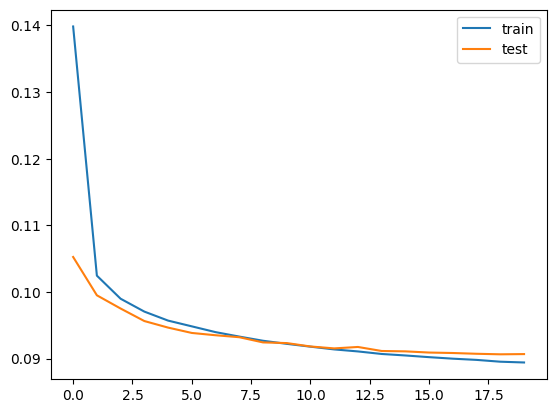

313/313 [==============================] - 15s 48ms/step


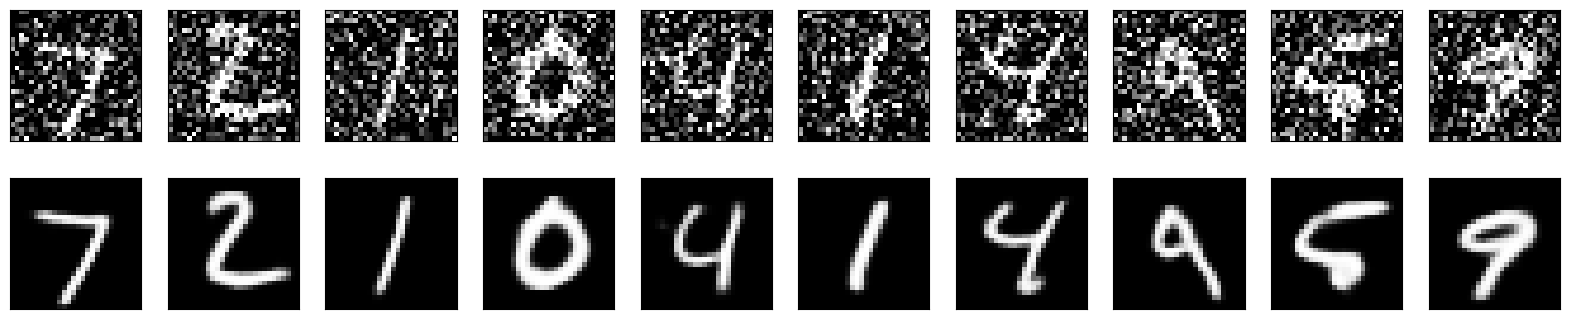

In [3]:
# Підключення необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Завантаження та підготовка даних
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Додавання шуму до зображень
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Визначення архітектури звичайного автокодувальника (згорткова модель)
input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Тренування автокодувальника
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Графік функції втрат
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Результати реконструкції
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # вхідні зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # відновлені зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
